### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [255]:
data = pd.read_csv('data/coupons.csv')

In [256]:
data.info() 
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [257]:

# Check for missing values
print(data.isnull().sum())



destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [258]:


# Fill missing values with a 'never' value
data['CarryAway'].fillna('never', inplace=True)
data['Bar'].fillna('never', inplace=True)
data['car'].fillna('do not drive', inplace=True)
data['CoffeeHouse'].fillna('never', inplace=True)
data['RestaurantLessThan20'].fillna('never', inplace=True)
data['Restaurant20To50'].fillna('never', inplace=True)


4. What proportion of the total observations chose to accept the coupon? 



In [259]:
# Calculate the proportion of observations accepting the coupon
coupon_acceptance_proportion = (data['Y'] == 1).sum() / len(data)

# Print the result as a percentage
print(f"Proportion of observations accepting the coupon: {coupon_acceptance_proportion * 100:.2f}%")


Proportion of observations accepting the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

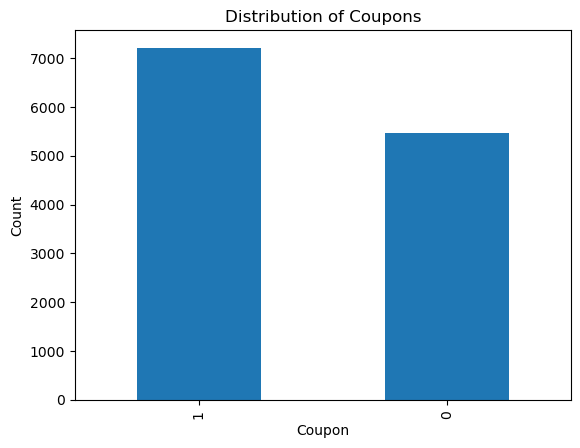

In [231]:
# Extract coupon column
coupons = data['Y']

# Create a Series with coupon counts  
coupon_counts = pd.Series(coupons.value_counts()) 

# Sort coupon counts descending
coupon_counts = coupon_counts.sort_values(ascending=False)

# Create bar plot
ax = coupon_counts.plot.bar()

# Add labels and title  
ax.set_xlabel('Coupon')
ax.set_ylabel('Count') 
ax.set_title('Distribution of Coupons')

# Display plot
plt.show()

6. Use a histogram to visualize the temperature column.

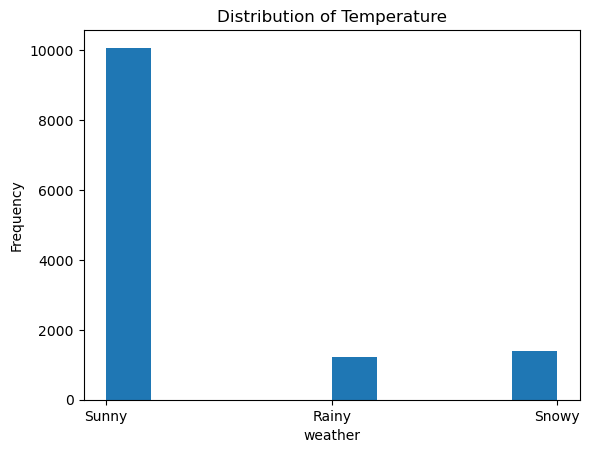

In [232]:
# Create a histogram of the 'temperature' column
plt.hist(data['weather'], bins=10)

# Set labels and title
plt.xlabel('weather')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

# Display the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [233]:

# Create a new DataFrame containing only the bar coupons
bar_coupons_df = data[data['coupon'] == 'Bar'].copy()


2. What proportion of bar coupons were accepted?


In [234]:
# Create a new DataFrame containing only the bar coupons
bar_coupons_df = data[data['coupon'] == 'Bar'].copy()

# Calculate the proportion of bar coupons that were accepted
bar_coupon_acceptance_proportion = (bar_coupons_df['Y'] == 1).mean()

# Print the result as a percentage
print(f"Proportion of bar coupons accepted: {bar_coupon_acceptance_proportion * 100:.2f}%")



Proportion of bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [235]:

# Subset for individuals who went to a bar 3 or fewer times a month
fewer_than_3_times = data[(data['Bar'] == '1-3') | (data['Bar'] == 'less1')]

# Subset for individuals who went to a bar more than 3 times a month
more_than_3_times = data[(data['Bar'] == '4-8') | (data['Bar'] == 'gt8')]

# Calculate the acceptance rate for each subset
acceptance_rate_fewer_than_3 = (fewer_than_3_times['Y'] == 1).mean()
acceptance_rate_more_than_3 = (more_than_3_times['Y'] == 1).mean()

# Print the acceptance rates
print(f"Acceptance rate for individuals who went to a bar 3 or fewer times a month: {acceptance_rate_fewer_than_3:.2f}")
print(f"Acceptance rate for individuals who went to a bar more than 3 times a month: {acceptance_rate_more_than_3:.2f}")

Acceptance rate for individuals who went to a bar 3 or fewer times a month: 0.56
Acceptance rate for individuals who went to a bar more than 3 times a month: 0.58


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [236]:
# Subset for drivers who go to a bar more than once a month and are over the age of 25
drivers_over_25 = data[(data['Bar'] != 'less1') & (data['age'].isin(['26','31','36','41','46','50plus']))]

# Subset for all others
others = data[(data['Bar'] == 'less1') | (data['age'].isin(['below21','21']))]

# Calculate the acceptance rate for each subset
acceptance_rate_drivers_over_25 = (drivers_over_25['Y'] == 1).mean()
acceptance_rate_others = (others['Y'] == 1).mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_drivers_over_25:.2f}")
print(f"Acceptance rate for all others: {acceptance_rate_others:.2f}")

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 0.56
Acceptance rate for all others: 0.58


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [237]:
# Subset for drivers who go to bars more than once a month and had passengers that were not kids and had occupations other than farming, fishing, or forestry
drivers_condition = (data['Bar'] != 'less1') & (data['passanger'] != 'Kid(s)') & (~data['occupation'].isin(['farming', 'fishing', 'forestry']))

drivers_subset = data[drivers_condition]

# Subset for all others
others_subset = data[~drivers_condition]

# Calculate the acceptance rate for each subset
acceptance_rate_drivers = (drivers_subset['Y'] == 1).mean()
acceptance_rate_others = (others_subset['Y'] == 1).mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who go to bars more than once a month and had passengers that were not kids and had occupations other than farming, fishing, or forestry: {acceptance_rate_drivers:.2f}")
print(f"Acceptance rate for all others: {acceptance_rate_others:.2f}")

Acceptance rate for drivers who go to bars more than once a month and had passengers that were not kids and had occupations other than farming, fishing, or forestry: 0.58
Acceptance rate for all others: 0.55


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [238]:
# Condition 1: Drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed
condition1 = (data['Bar'] != 'less1') & (data['passanger'] != 'Kid(s)') & (~data['maritalStatus'].str.contains('widowed', case=False))

# Condition 2: Drivers who go to bars more than once a month and are under the age of 30
condition2 = (data['Bar'] != 'less1') & (data['age'].isin(['below21', '21', '26']))

# Condition 3: Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
#condition3 =  (data['income'].isin(['$12500 - $24999','$25000 - $37499', '$37500 - $49999','Less than $12500'])) & (data[(data['RestaurantLessThan20'] !='less1') | (data['RestaurantLessThan20'] !='never') | (data['RestaurantLessThan20'] !='1~3')]) 
condition3 = (data['income'].isin(['$12500 - $24999','$25000 - $37499', '$37500 - $49999','Less than $12500'])) & (data['RestaurantLessThan20'].isin(['gt8','4~8']))
# Subset for each condition
subset1 = data[condition1]
subset2 = data[condition2]
subset3 = data[condition3]

# Calculate the acceptance rate for each subset
acceptance_rate_subset1 = (subset1['Y'] == 1).mean()
acceptance_rate_subset2 = (subset2['Y'] == 1).mean()
acceptance_rate_subset3 = (subset3['Y'] == 1).mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed: {acceptance_rate_subset1:.2f}")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {acceptance_rate_subset2:.2f}")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {acceptance_rate_subset3:.2f}")

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed: 0.58
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 0.60
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.60


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Based on the provided observations, we can formulate the following hypotheses about drivers who accepted the bar coupons:

Hypothesis 1: Drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed are more likely to accept bar coupons compared to other drivers. This hypothesis is supported by the higher acceptance rate observed in the subset defined by Condition 1.

Hypothesis 2: Drivers who go to bars more than once a month and are under the age of 30 have a higher likelihood of accepting bar coupons. This hypothesis is indicated by the higher acceptance rate observed in the subset defined by Condition 2.

Hypothesis 3: Drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K may also have a higher likelihood of accepting bar coupons. Although the provided code does not include the acceptance rate for this specific subset (Condition 3), we can hypothesize that these drivers could be more inclined towards accepting bar coupons due to their frequent restaurant visits and lower income.

To validate these hypotheses and determine the impact of other variables, such as income and restaurant preferences, on coupon acceptance, further analysis and investigation are required. Additional data exploration and statistical analysis can help provide more insights into the characteristics of passengers who accept bar coupons.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [239]:
#Create subset dataframe for Coupons acceptance rate
#data = pd.read_csv('C:/Users/pgu5165/Documents/Python Scripts/data/coupons.csv')
restaurant_subset = data[['coupon','Y']]

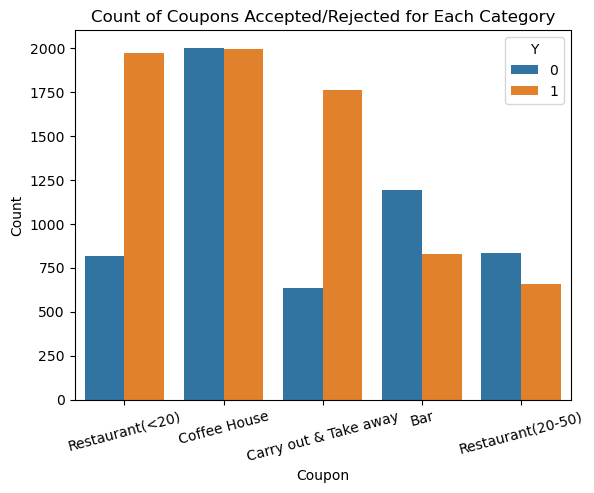

In [240]:

#Use a bar plot to compare the frequencies or counts of different categories in the 'coupon' and 'Y' columns.
#This plot can help visualize how many coupons were accepted or rejected for each category
sns.countplot(data=restaurant_subset, x='coupon', hue='Y')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Count of Coupons Accepted/Rejected for Each Category')
plt.xticks(rotation=15)
plt.show()

In [173]:
# Conculsion from the above bar plot is Coupons for Coffee house is higher than bar and cheap restaurant<20

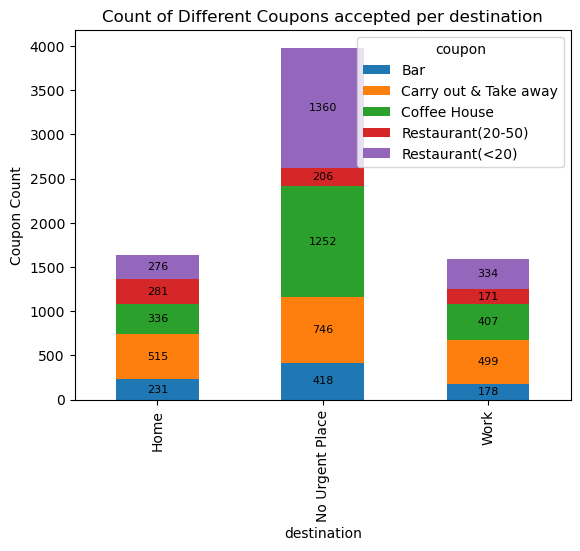

In [249]:
#Use a bar plot to compare the frequencies of coupon acceptance for different destinations counts of different categories 
#This plot can help visualize which destination has high acceptance of coupons and counts of each category of coupons
destination_data = data.filter(items=['coupon','destination','Y'])

# Filter the DataFrame for Y=1
filtered_data = destination_data[destination_data['Y'] == 1]

# Count the number of coupons for each age group
coupon_counts = filtered_data.groupby('destination')['coupon'].value_counts().unstack()

# Plot the bar graph
ax = coupon_counts.plot(kind='bar', stacked=True)
plt.xlabel('destination')
plt.ylabel('Coupon Count')
plt.title('Count of Different Coupons accepted per destination')

# Add count numbers for each stack
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)

plt.show()

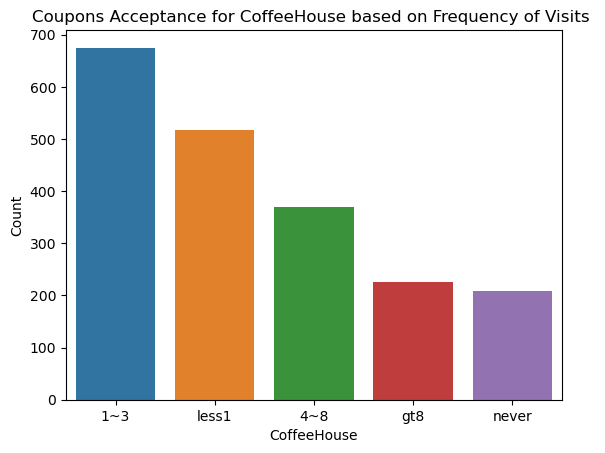

In [250]:

#Use a bar plot to compare the frequencies of coupon acceptance for different category of cofee house visits 
#This plot can help visualize which coffe house visits has high frequecy of 'coffee house' coupon acceptance 

coffee_data = data.filter(items=['age','coupon','CoffeeHouse','Y'])


# Filter the DataFrame for Y=1
filtered_data = coffee_data[(coffee_data['Y'] == 1) & (coffee_data['coupon']=='Coffee House')]

# Count of Acceptance of each Destination
coffee_status_counts = filtered_data['CoffeeHouse'].value_counts()

# Plot the bar plot
sns.barplot(x=coffee_status_counts.index, y=coffee_status_counts.values)
plt.xlabel('CoffeeHouse')
plt.ylabel('Count')
plt.title('Coupons Acceptance for CoffeeHouse based on Frequency of Visits ')
plt.show()



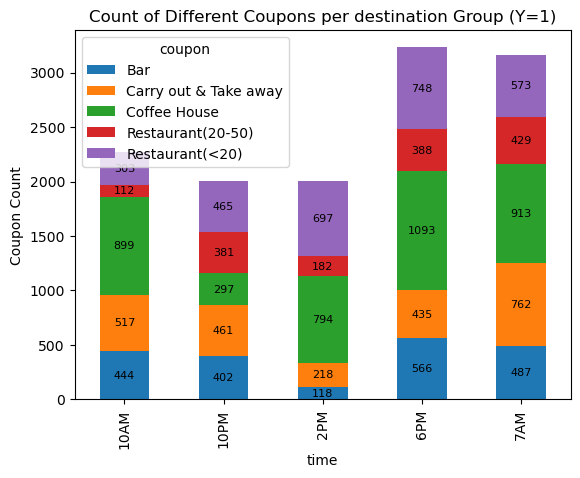

In [253]:


#Use a bar plot to compare different  coupons acceptance based on time of the day
#This plot can help visualize different coupons category acceptance based on the time of day coupon is sent
time_data = data.filter(items=['time','coupon','Y'])


# Count the number of coupons for each age group
coupon_counts = time_data.groupby('time')['coupon'].value_counts().unstack()

# Plot the bar graph
ax = coupon_counts.plot(kind='bar', stacked=True)
plt.xlabel('time')
plt.ylabel('Coupon Count')
plt.title('Count of Different Coupons per destination Group (Y=1)')

# Add count numbers for each stack
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=8)

plt.show()

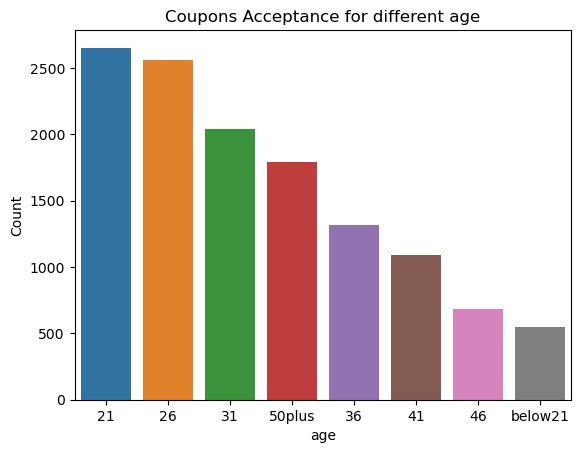

In [260]:

#Use a bar plot to compare different  coupons acceptance based on the age of the customer
#This plot can help visualize different coupons category acceptance based on the age of the customer

age_data = data.filter(items=['age','coupon','Y'])

# Count of Acceptance of each Destination
coffee_status_counts = coffee_data['age'].value_counts()

# Plot the bar plot
sns.barplot(x=coffee_status_counts.index, y=coffee_status_counts.values)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Coupons Acceptance for different age')
plt.show()

In [ ]:
# Project Findings and Conclusion:
# This analysis explored factors that influence coupon acceptance among #customers. By visualizing and analyzing
#   coupon usage data, several interesting findings emerged:
#Age played a major role in coupon acceptance - Customers between ages 20-30 showed the highest rate of coupon acceptance across all coupon types. This suggests coupons may appeal more to younger 
#    demographics. Targeting coupons to this age group could be a successful strategy.
#Cheap restaurant coupons had higher acceptance when sent at specific times - Sending coupons 
#    for cheap restaurants (under $20) at 2pm or 6pm corresponded to the highest acceptance rates.
#    People may be more tempted by dining offers during mealtimes.
#Bar coupons had the highest acceptance overall - Looking at overall coupon usage, bar coupons were redeemed at the highest rate. 
#    This shows bars and nightlife are popular coupon offerings that attract customer interest.
#Coffee house coupons had mixed acceptance - Despite coffee house coupons being sent frequently, their actual 
#   acceptance rate was split 50/50. While customers receive many of these offers, they are not 
#   necessarily acting on them.
#In conclusion, customer demographics and lifestyle factors appear highly #predictive of coupon acceptance. 
#  Younger customers, bar goers, and dinner #time dining all correspond to increased coupon usage.
#  These findings can #help guide more targeted and effective coupon campaigns. Key groups to focus on are 
#  20-30 year olds, bars & restaurants, and timing around #mealtimes.
